In [1]:
import pandas as pd
import requests
import json
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

In [2]:
df = pd.read_csv("../data/df_baseline.csv")
test = pd.read_csv("../data/tests/diamonds_test.csv")

In [3]:
df

,price,carat,city,depth,table,x,y,z,clarity,color,cut
0,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,VS2,H,Very Good
1,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,VS1,G,Fair
2,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,SI1,D,Good
3,9057,1.52,Tel Aviv,61.2,57.0,7.45,7.39,4.54,SI2,F,Ideal
4,557,0.31,Zurich,61.8,54.2,4.33,4.37,2.69,VS1,H,Ideal
...,...,...,...,...,...,...,...,...,...,...,...
40450,1116,0.35,Amsterdam,62.2,58.0,4.52,4.45,2.79,IF,G,Premium
40451,975,0.40,Luxembourg,62.4,55.0,4.74,4.71,2.95,VS2,E,Ideal
40452,8572,1.57,Tel Aviv,61.1,61.0,7.46,7.43,4.55,SI2,G,Premium
40453,5154,0.73,Paris,61.4,56.0,5.80,5.81,3.56,VVS1,F,Ideal


In [4]:
test

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam
13481,13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City
13482,13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv
13483,13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,Surat


In [5]:
df.describe()

,price,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000


In [6]:
df = df[df['x'] > 0.05]
df = df[df['x'] < 90]

In [7]:
df = df[df['y'] > 0.05]
df = df[df['y'] < 50]

In [8]:
df = df[df['depth'] > 50]
df = df[df['depth'] < 75]

In [9]:
df = df[df['table'] > 45]
df = df[df['table'] < 75]

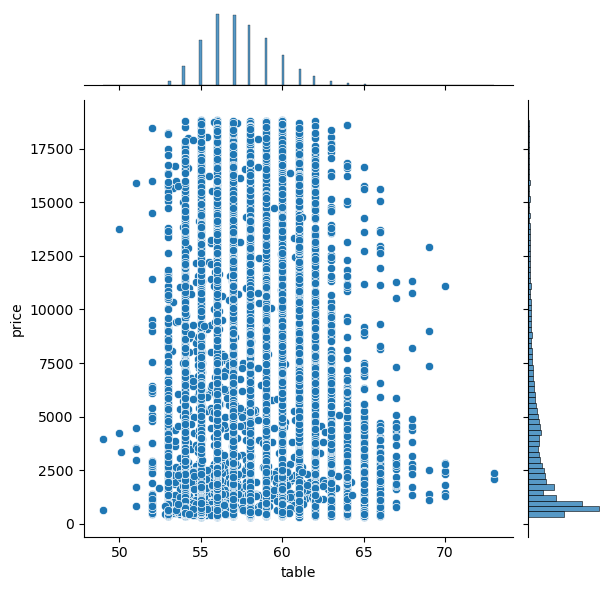

In [10]:
sns.jointplot(data=df, x="table", y="price")

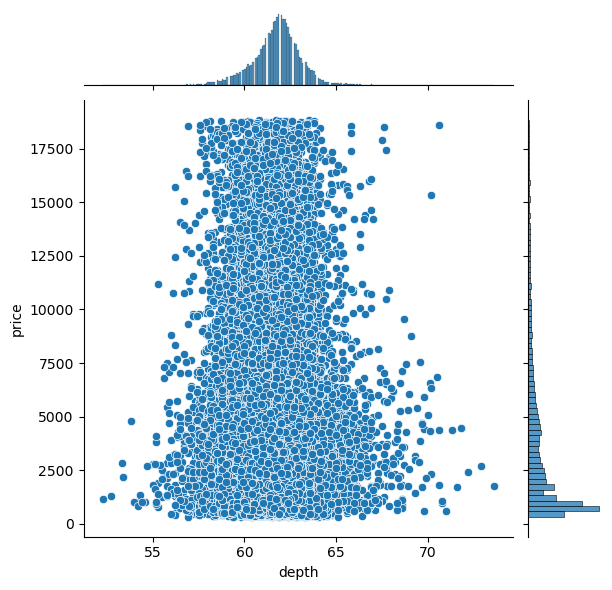

In [11]:
sns.jointplot(data=df, x="depth", y="price")

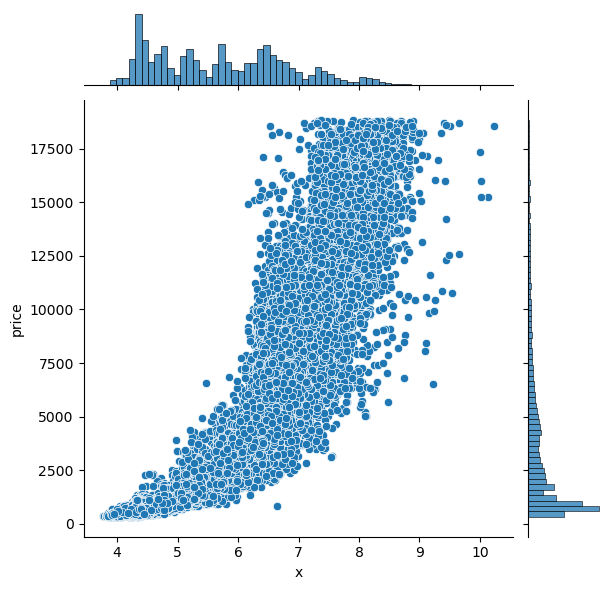

In [12]:
sns.jointplot(data=df, x="x", y="price")

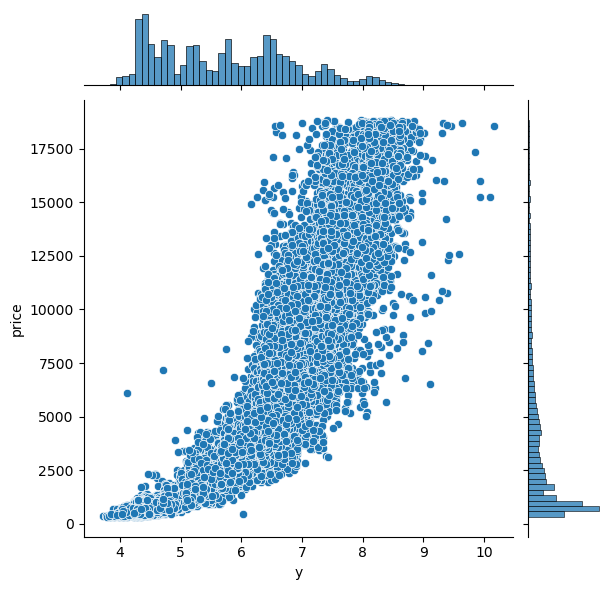

In [13]:
sns.jointplot(data=df, x="y", y="price")

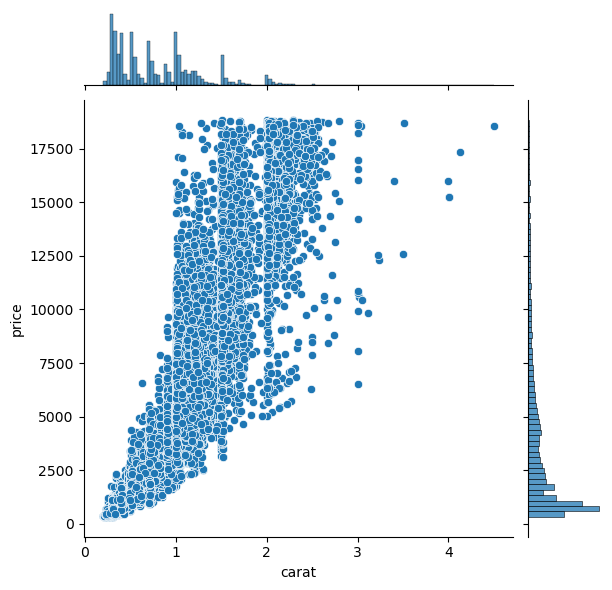

In [14]:
sns.jointplot(data=df, x="carat", y="price")

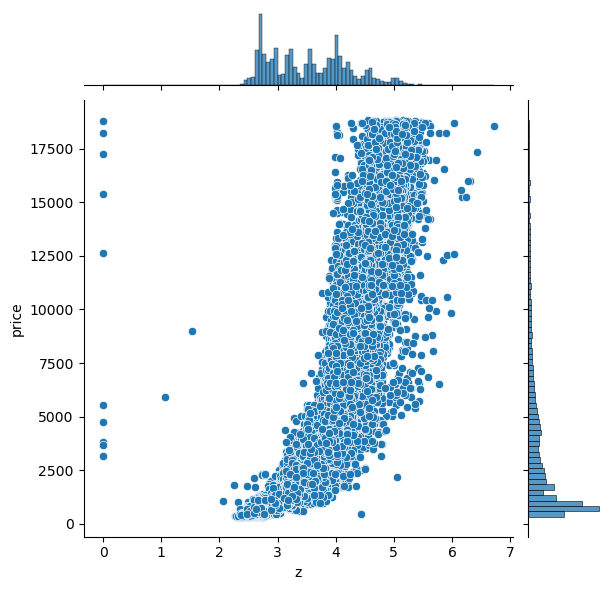

In [15]:
sns.jointplot(data=df, x="z", y="price")

In [16]:
df.describe()

,price,carat,depth,table,x,y,z
count,40440.000000,40440.000000,40440.000000,40440.000000,40440.000000,40440.000000,40440.000000
mean,3927.814985,0.797596,61.753581,57.444320,5.729978,5.732001,3.537406
std,3991.944474,0.475481,1.419599,2.217318,1.122668,1.114377,0.695646
min,326.000000,0.200000,52.300000,49.000000,3.770000,3.720000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2396.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000
max,18823.000000,4.500000,73.600000,73.000000,10.230000,10.160000,6.720000


In [17]:
test.describe()

,id,carat,depth,table,x,y,z
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,6742.000000,0.798642,61.739095,57.490337,5.736454,5.739648,3.543474
std,3892.928525,0.469399,1.435310,2.237109,1.113671,1.128507,0.731005
min,0.000000,0.200000,50.800000,51.000000,0.000000,0.000000,0.000000
25%,3371.000000,0.400000,61.000000,56.000000,4.730000,4.730000,2.920000
50%,6742.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000
75%,10113.000000,1.040000,62.500000,59.000000,6.530000,6.530000,4.040000
max,13484.000000,5.010000,79.000000,73.000000,10.740000,31.800000,31.800000


<Axes: xlabel='carat', ylabel='Count'>

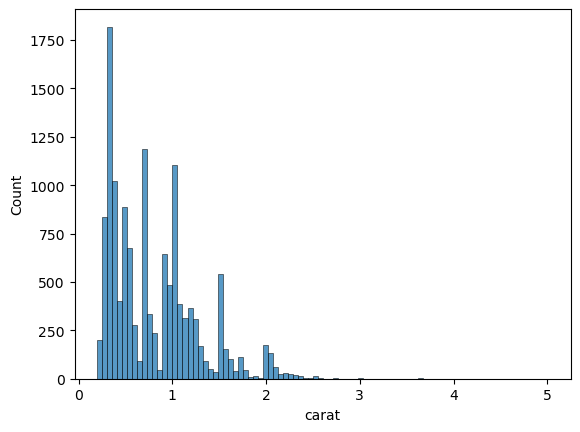

In [18]:
sns.histplot(data=test, x="carat")

In [19]:
test.loc[test['x'] < 2, 'x'] = 5.729978
test.loc[test['x'] > 10, 'x'] = 10

In [20]:
test.loc[test['y'] < 2, 'y'] = 5.739648
test.loc[test['y'] > 10, 'y'] = 10

In [21]:
test.loc[test['table'] < 49, 'table'] = 57.490337
test.loc[test['table'] > 73, 'table'] = 57.490337

In [22]:
test.loc[test['depth'] < 52, 'depth'] = 61.753581
test.loc[test['depth'] > 73, 'depth'] = 61.753581

In [23]:
test.describe()

,id,carat,depth,table,x,y,z
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,6742.000000,0.798642,61.738206,57.490337,5.737674,5.739268,3.543474
std,3892.928525,0.469399,1.414388,2.237109,1.110149,1.103094,0.731005
min,0.000000,0.200000,52.200000,51.000000,3.730000,3.680000,0.000000
25%,3371.000000,0.400000,61.000000,56.000000,4.730000,4.730000,2.920000
50%,6742.000000,0.700000,61.900000,57.000000,5.710000,5.720000,3.530000
75%,10113.000000,1.040000,62.500000,59.000000,6.530000,6.530000,4.040000
max,13484.000000,5.010000,71.600000,73.000000,10.000000,10.000000,31.800000


## Categorical data

In [24]:
#Extract City
df_cat = df[['cut','color','clarity','city']]
df_cat

,cut,color,clarity,city
0,Very Good,H,VS2,Kimberly
1,Fair,G,VS1,Las Vegas
2,Good,D,SI1,Kimberly
3,Ideal,F,SI2,Tel Aviv
4,Ideal,H,VS1,Zurich
...,...,...,...,...
40450,Premium,G,IF,Amsterdam
40451,Ideal,E,VS2,Luxembourg
40452,Premium,G,SI2,Tel Aviv
40453,Ideal,F,VVS1,Paris


In [25]:
cols = df_cat.columns

In [26]:
#Label encoding

le = LabelEncoder()
for i in cols:
    df_cat[i] = le.fit_transform(df_cat[i])
df_cat

/tmp/ipykernel_33340/3040120298.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i] = le.fit_transform(df_cat[i])
/tmp/ipykernel_33340/3040120298.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i] = le.fit_transform(df_cat[i])
/tmp/ipykernel_33340/3040120298.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,cut,color,clarity,city
0,4,4,5,3
1,0,3,4,4
2,1,0,2,3
3,2,2,3,11
4,2,4,4,12
...,...,...,...,...
40450,3,3,1,0
40451,2,1,5,6
40452,3,3,3,11
40453,2,2,6,9


In [27]:
test_cols = ['cut','color','clarity','city']
for i in test_cols:
    test[i] = le.fit_transform(test[i])
test

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,4,2,2,62.7,60.0,5.82,5.89,3.67,0
1,1,1.20,2,6,4,61.0,57.0,6.81,6.89,4.18,10
2,2,1.57,3,4,2,62.2,61.0,7.38,7.32,4.57,3
3,3,0.90,4,2,2,63.8,54.0,6.09,6.13,3.90,3
4,4,0.50,4,2,4,62.9,58.0,5.05,5.09,3.19,0
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,2,1,2,61.9,56.0,5.35,5.32,3.30,0
13481,13481,0.71,2,5,5,62.2,55.0,5.71,5.73,3.56,8
13482,13482,0.70,2,2,4,61.6,55.0,5.75,5.71,3.53,11
13483,13483,0.70,4,2,3,58.8,57.0,5.85,5.89,3.45,10


In [28]:
# Numeric variables
df_num = df[['price','carat','depth','table','x','y']]
df_num

,price,carat,depth,table,x,y
0,505,0.32,63.0,57.0,4.35,4.38
1,2686,0.71,65.5,55.0,5.62,5.53
2,738,0.41,63.8,56.0,4.68,4.72
3,9057,1.52,61.2,57.0,7.45,7.39
4,557,0.31,61.8,54.2,4.33,4.37
...,...,...,...,...,...,...
40450,1116,0.35,62.2,58.0,4.52,4.45
40451,975,0.40,62.4,55.0,4.74,4.71
40452,8572,1.57,61.1,61.0,7.46,7.43
40453,5154,0.73,61.4,56.0,5.80,5.81


In [29]:
df_num['L/W ratio'] = df_num['x'] / df_num['y']
df_num

/tmp/ipykernel_33340/827459682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['L/W ratio'] = df_num['x'] / df_num['y']


,price,carat,depth,table,x,y,L/W ratio
0,505,0.32,63.0,57.0,4.35,4.38,0.993151
1,2686,0.71,65.5,55.0,5.62,5.53,1.016275
2,738,0.41,63.8,56.0,4.68,4.72,0.991525
3,9057,1.52,61.2,57.0,7.45,7.39,1.008119
4,557,0.31,61.8,54.2,4.33,4.37,0.990847
...,...,...,...,...,...,...,...
40450,1116,0.35,62.2,58.0,4.52,4.45,1.015730
40451,975,0.40,62.4,55.0,4.74,4.71,1.006369
40452,8572,1.57,61.1,61.0,7.46,7.43,1.004038
40453,5154,0.73,61.4,56.0,5.80,5.81,0.998279


In [30]:
test['L/W ratio'] = test['x'] / test['y']
test

,id,carat,cut,color,clarity,depth,table,x,y,z,city,L/W ratio
0,0,0.79,4,2,2,62.7,60.0,5.82,5.89,3.67,0,0.988115
1,1,1.20,2,6,4,61.0,57.0,6.81,6.89,4.18,10,0.988389
2,2,1.57,3,4,2,62.2,61.0,7.38,7.32,4.57,3,1.008197
3,3,0.90,4,2,2,63.8,54.0,6.09,6.13,3.90,3,0.993475
4,4,0.50,4,2,4,62.9,58.0,5.05,5.09,3.19,0,0.992141
...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,2,1,2,61.9,56.0,5.35,5.32,3.30,0,1.005639
13481,13481,0.71,2,5,5,62.2,55.0,5.71,5.73,3.56,8,0.996510
13482,13482,0.70,2,2,4,61.6,55.0,5.75,5.71,3.53,11,1.007005
13483,13483,0.70,4,2,3,58.8,57.0,5.85,5.89,3.45,10,0.993209


In [31]:
test.describe()

,id,carat,cut,color,clarity,depth,table,x,y,z,city,L/W ratio
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,6742.000000,0.798642,2.554394,2.579088,3.820171,61.738206,57.490337,5.737674,5.739268,3.543474,5.783686,0.999544
std,3892.928525,0.469399,1.024375,1.700614,1.723314,1.414388,2.237109,1.110149,1.103094,0.731005,3.813219,0.011519
min,0.000000,0.200000,0.000000,0.000000,0.000000,52.200000,51.000000,3.730000,3.680000,0.000000,0.000000,0.515000
25%,3371.000000,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,4.730000,4.730000,2.920000,2.000000,0.992669
50%,6742.000000,0.700000,2.000000,3.000000,4.000000,61.900000,57.000000,5.710000,5.720000,3.530000,6.000000,0.995781
75%,10113.000000,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,6.530000,6.530000,4.040000,10.000000,1.006993
max,13484.000000,5.010000,4.000000,6.000000,7.000000,71.600000,73.000000,10.000000,10.000000,31.800000,12.000000,1.601415


In [32]:
df_num.describe()

,price,carat,depth,table,x,y,L/W ratio
count,40440.000000,40440.000000,40440.000000,40440.000000,40440.000000,40440.000000,40440.000000
mean,3927.814985,0.797596,61.753581,57.444320,5.729978,5.732001,0.999415
std,3991.944474,0.475481,1.419599,2.217318,1.122668,1.114377,0.010352
min,326.000000,0.200000,52.300000,49.000000,3.770000,3.720000,0.749169
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,0.992606
50%,2396.000000,0.700000,61.800000,57.000000,5.690000,5.710000,0.995736
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,1.006928
max,18823.000000,4.500000,73.600000,73.000000,10.230000,10.160000,1.615572


In [33]:
df_num[df_num['L/W ratio'] < 0.95]

,price,carat,depth,table,x,y,L/W ratio
3317,2030,0.53,62.7,56.0,5.16,6.20,0.832258
5529,700,0.42,59.5,57.0,4.78,5.11,0.935421
16522,468,0.39,61.2,58.0,4.51,6.02,0.749169
21883,1282,0.50,59.9,56.0,5.09,5.36,0.949627


In [34]:
test[test['L/W ratio'] < 0.95]

,id,carat,cut,color,clarity,depth,table,x,y,z,city,L/W ratio
1665,1665,0.51,2,1,4,61.8,55.0,5.15,10.0,5.12,8,0.515


In [35]:
df = pd.concat([df_num, df_cat], axis=1)

In [36]:
df

,price,carat,depth,table,x,y,L/W ratio,cut,color,clarity,city
0,505,0.32,63.0,57.0,4.35,4.38,0.993151,4,4,5,3
1,2686,0.71,65.5,55.0,5.62,5.53,1.016275,0,3,4,4
2,738,0.41,63.8,56.0,4.68,4.72,0.991525,1,0,2,3
3,9057,1.52,61.2,57.0,7.45,7.39,1.008119,2,2,3,11
4,557,0.31,61.8,54.2,4.33,4.37,0.990847,2,4,4,12
...,...,...,...,...,...,...,...,...,...,...,...
40450,1116,0.35,62.2,58.0,4.52,4.45,1.015730,3,3,1,0
40451,975,0.40,62.4,55.0,4.74,4.71,1.006369,2,1,5,6
40452,8572,1.57,61.1,61.0,7.46,7.43,1.004038,3,3,3,11
40453,5154,0.73,61.4,56.0,5.80,5.81,0.998279,2,2,6,9


In [37]:
test = test[['carat','depth','table','x','y','L/W ratio','cut','color','clarity','city']]
test

,carat,depth,table,x,y,L/W ratio,cut,color,clarity,city
0,0.79,62.7,60.0,5.82,5.89,0.988115,4,2,2,0
1,1.20,61.0,57.0,6.81,6.89,0.988389,2,6,4,10
2,1.57,62.2,61.0,7.38,7.32,1.008197,3,4,2,3
3,0.90,63.8,54.0,6.09,6.13,0.993475,4,2,2,3
4,0.50,62.9,58.0,5.05,5.09,0.992141,4,2,4,0
...,...,...,...,...,...,...,...,...,...,...
13480,0.57,61.9,56.0,5.35,5.32,1.005639,2,1,2,0
13481,0.71,62.2,55.0,5.71,5.73,0.996510,2,5,5,8
13482,0.70,61.6,55.0,5.75,5.71,1.007005,2,2,4,11
13483,0.70,58.8,57.0,5.85,5.89,0.993209,4,2,3,10


In [38]:
X = df[['carat','depth','table','x','y','L/W ratio','cut','color','clarity','city']]
y = df['price']

In [39]:
y

0         505
1        2686
2         738
3        9057
4         557
         ... 
40450    1116
40451     975
40452    8572
40453    5154
40454    1148
Name: price, Length: 40440, dtype: int64

In [40]:
# Create train and test (validation) samples

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (32352, 10), X_test: (8088, 10), y_train: (32352,), y_test: (8088,)


In [41]:
# Random Forest
model = RandomForestRegressor()

In [42]:
param_grid = {'n_estimators': [16, 32, 64, 128, 256, 512],
              'max_depth': [2, 4, 8, 16]}

In [43]:
grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,
                           verbose=3,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

In [44]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 5/5] END ..max_depth=2, n_estimators=16;, score=-1538.260 total time=   0.3s
[CV 1/5] END ..max_depth=2, n_estimators=64;, score=-1674.218 total time=   1.1s
[CV 1/5] END .max_depth=2, n_estimators=256;, score=-1656.825 total time=   4.0s
[CV 4/5] END .max_depth=2, n_estimators=512;, score=-1606.285 total time=   7.7s
[CV 2/5] END .max_depth=4, n_estimators=256;, score=-1136.463 total time=   6.9s
[CV 5/5] END .max_depth=4, n_estimators=512;, score=-1084.270 total time=  15.5s
[CV 3/5] END ..max_depth=8, n_estimators=256;, score=-652.344 total time=  14.4s
[CV 1/5] END ..max_depth=16, n_estimators=16;, score=-593.196 total time=   1.8s
[CV 4/5] END ..max_depth=16, n_estimators=16;, score=-555.609 total time=   1.8s
[CV 2/5] END ..max_depth=16, n_estimators=32;, score=-620.744 total time=   3.5s
[CV 5/5] END ..max_depth=16, n_estimators=32;, score=-567.799 total time=   3.5s
[CV 3/5] END ..max_depth=16, n_estimators=64;, 

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 16],
                         'n_estimators': [16, 32, 64, 128, 256, 512]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [69]:
model = RandomForestRegressor(max_depth=16, n_estimators=256)

In [70]:
model.fit(X, y)

RandomForestRegressor(max_depth=16, n_estimators=256)

In [71]:
predictions = model.predict(X_test)

In [72]:
check = pd.DataFrame({'Ground truth':y_test, 'Predictions':predictions, 'Diff':y_test-predictions})
check

,Ground truth,Predictions,Diff
31779,3007,2763.720387,243.279613
12373,9901,10100.594806,-199.594806
22910,8216,8458.462287,-242.462287
33827,5259,5232.150891,26.849109
2832,1928,1801.579325,126.420675
...,...,...,...
29190,526,515.232080,10.767920
188,641,677.370130,-36.370130
8227,1776,1348.161560,427.838440
39827,4702,4866.790133,-164.790133


In [73]:
rmse = mean_squared_error(y_test, predictions, squared=False)
rmse

267.4383676877061

In [50]:
predictions = model.predict(test)

In [51]:
predictions

array([3069.38569449, 5411.94681467, 9319.23371561, ..., 2904.81902715,
       2186.85988842,  810.68201813])

In [52]:
result = pd.DataFrame({'id': range(0, len(predictions)), 'price': predictions})
result

,id,price
0,0,3069.385694
1,1,5411.946815
2,2,9319.233716
3,3,4089.670902
4,4,1670.268228
...,...,...
13480,13480,1812.397910
13481,13481,2397.223447
13482,13482,2904.819027
13483,13483,2186.859888


In [53]:
result.describe()

,id,price
count,13485.000000,13485.000000
mean,6742.000000,3955.230769
std,3892.928525,3949.048493
min,0.000000,361.008090
25%,3371.000000,972.783307
50%,6742.000000,2461.989383
75%,10113.000000,5328.960006
max,13484.000000,18145.265702


In [54]:
result.to_csv("../submissions/submision_enlabel_random_forest_16_512.csv", index=False)